In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data import

In [2]:
user = pd.read_csv(r'/home/quannt/DATAcracy/Scala/user_processed.csv')
user.head()

,UserID (PK),VIP hay Free,Gender,Year of Birth,Age Range,Age,Region,Operation Systems,Registration Date,Total Listerning,Total Listening Time (Min)
0,86229,free,male,NaN,No information,NaN,VN,android,2020-11-27,218,4151.3
1,48053,free,male,1995.0,25 - 34,26.0,VN,ios,2020-08-24,19,278.6
2,46340,free,male,1988.0,25 - 34,33.0,VN,website,2020-08-19,28,170.5
3,66659,free,male,1992.0,25 - 34,29.0,VN,website,2020-10-22,345,6721.4
4,59396,free,male,NaN,No information,NaN,VN,android,2020-09-29,23,52.5


In [3]:
order = pd.read_csv(r'/home/quannt/DATAcracy/Scala/order_processed.csv')
order.head()

,OrderID (PK),Transaction Date,UserID (FK),Bill Type,Total Amount
0,6706,2020-08-16,44822,VIP,199000
1,6998,2020-08-23,47128,VIP,199000
2,6927,2020-08-21,47134,VIP,199000
3,7054,2020-08-25,45972,VIP,199000
4,6929,2020-08-21,43556,VIP,199000


In [4]:
listening = pd.read_csv(r'/home/quannt/DATAcracy/Scala/listening_processed.csv')
listening.head()

,PlaylistID (PK),Playlist Name,Category,Sub Category,Playlist Type,Playlist Duration (min),Actual Duration (min),UserID (FK),Listening Time,Listening Date,Listening Datetime,Unnamed: 11
0,4529,Dạy Tiếng Anh Cho Trẻ Mầm Non,Podcast,Học ngoại ngữ,free,44.9,0.1,82846,06:05:00,03-12-2020,2020-12-03 06:05:00,NaN
1,4577,Tư Duy Tích Cực - Bạn Là Những Gì Bạn Nghĩ (Nh...,Sách nói,Hạnh phúc,vip,79.8,15.9,56112,12:49:00,30-10-2020,2020-10-30 12:49:00,NaN
2,4169,50 thiên thần của bạn: Giải phóng bản thân khỏ...,Sách nói,Tâm linh,vip,324.8,6.8,94362,00:17:00,15-12-2020,2020-12-15 00:17:00,NaN
3,4581,[Sách Tóm Tắt] Đọc Vị Bất Kỳ Ai,Sách tóm tắt,Sách tóm tắt,free,24.8,2.1,85469,23:09:00,29-11-2020,2020-11-29 23:09:00,NaN
4,4577,Tư Duy Tích Cực - Bạn Là Những Gì Bạn Nghĩ (Nh...,Sách nói,Hạnh phúc,vip,79.8,19.0,70171,21:09:00,06-12-2020,2020-12-06 21:09:00,NaN


In [5]:
clutering = pd.read_csv(r'/home/quannt/DATAcracy/Scala/clustering_processed.csv')
clutering.head()

,User_ID (FK),Type_user,MainCluster_ID,MainCluster_Description
0,40834,free,1,Hibernating
1,40854,free,1,Hibernating
2,40876,free,1,Hibernating
3,40883,free,1,Hibernating
4,40891,free,1,Hibernating


##### Rename Columns

In [6]:
order = order.rename(columns = {"OrderID (PK)": "orderID", "Transaction Date" : "transaction_date","UserID (FK)" : "userID", "Bill Type": "bill_type", "Total Amount": "total_amount" })
clustering = clutering.rename(columns = {"User_ID (FK)": "userID", "Type_user": "type_user", "MainCluster_ID" : "main_cluseringID", "MainCluster_Description" : "main_clustering_description"})
listening = listening.rename(columns = {"PlaylistID (PK)": "playlistID", "Playlist Name":"playlist_name", "Category":"cat", "Sub Category" :"sub_cat", "Playlist Type" :"palylist_type","Playlist Duration (min)": "playlist_duration","Actual Duration (min)":"actual_duation","UserID (FK)":"userID", "Listening Time":"listening_time", "Listening Date" :"listening_date", "Listening Datetime":"listening_datetime"})
user = user.rename(columns = {"UserID (PK)":"userID", "VIP hay Free":"user_type", "Gender":"gender", "Year of Birth":"year_of_birth","Age Range": "age_range", "Age":"age", "Region": "region","Operation Systems":"operation_system","Registration Date":"registration_date", "Total Listerning":"total_listening", "Total Listening Time (Min)":"total_listening_time",   })

In [7]:
user.operation_system = user.operation_system.fillna('none')
user["gender"] = user.gender.replace("no information","none")
user["gender"] = user.gender.replace("other","none")
user["age_range"] = user.age_range.replace("no information","none")

In [8]:
user.gender.unique()

array(['male', 'female', 'none'], dtype=object)

# EDA

## 1. User paid

### 1.1 Gender

In [210]:
# order_1 =  order.groupby(['userID']).agg({
#     'transaction_date': 'min',
#     'oderID': 'count',
#     'total_amount' :'sum'
# }).reset_index()

In [9]:
order_1 =  order.groupby(['userID','bill_type']).agg({
    'transaction_date': 'min',
    'orderID': 'count',
    'total_amount' :'sum'
}).reset_index().sort_values(by = ['userID','transaction_date'], ascending = True)

In [10]:
user_1 = pd.merge(user, order_1, how = 'left', on = 'userID')

In [13]:
user_paid = user_1[user_1['orderID'].notnull()]

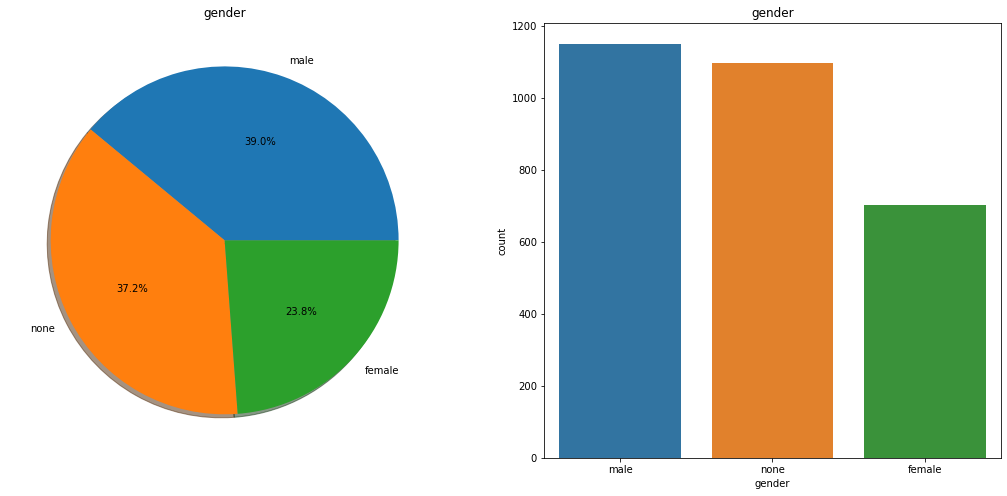

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
user_paid['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=user_paid,ax=ax[1])
ax[1].set_title('gender')
plt.show()

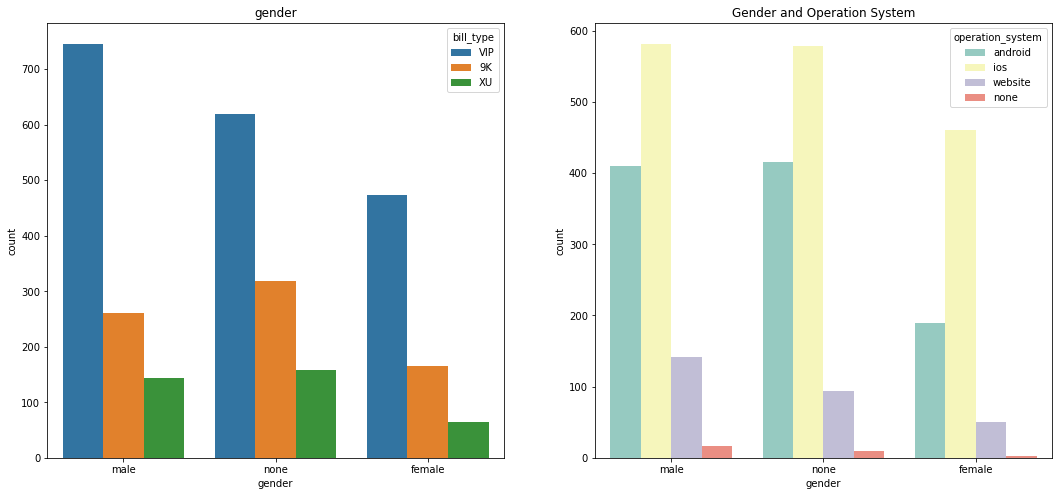

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('gender', hue = 'bill_type',data=user_paid,ax=ax[0])
ax[0].set_title('gender')
sns.countplot('gender', hue='operation_system',data=user_paid, ax=ax[1], palette='Set3')
ax[1].set_title('Gender and Operation System')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='total_amount'>

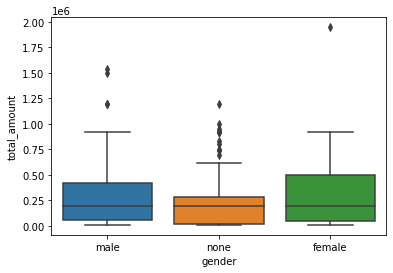

In [16]:
sns.boxplot(x='gender', y='total_amount',data=user_paid)

<AxesSubplot:xlabel='age_range', ylabel='count'>

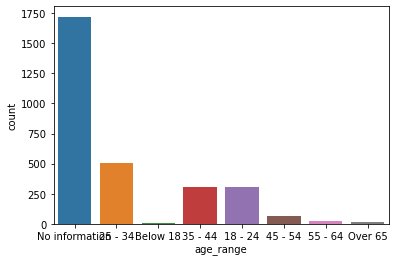

In [17]:
sns.countplot(x = 'age_range', data = user_paid)

## 1.2 Listening

In [18]:
listening['listening_datetime']= pd.to_datetime(listening['listening_datetime'])
listening['hour_listening'] = listening.listening_datetime.dt.hour
listening['dayofweek'] = listening['listening_datetime'].dt.dayofweek

In [19]:
listening["timepoint_of_the_day"] = listening.hour_listening.apply(lambda x : 
                                                             "late night" if x < 4 else
                                                             "early morning" if x < 7 else
                                                             "morning" if x < 11 else
                                                             "early afternoon" if x < 16 else
                                                             "afternoon" if x < 18 else
                                                             "evening"
                                                            )

listening['dayofweek'] =listening.dayofweek.apply(lambda x :  "Mon" if x == 0 else
                                                             "Tue" if x ==1 else
                                                             "Wed" if x ==2 else
                                                             "Thu" if x == 3 else
                                                             "Fri" if x == 4 else
                                                             "Sat" if x == 5 else
                                                             "Sun" 
                                                            )

listening['Workingday'] = listening["dayofweek"].apply(lambda x : 0 if x == 'Sun' or x == 'Sat' else 1)

In [231]:
# listening.groupby(['userID','sub_cat'])['actual_duation'].agg({
#     'actual_duation': 'mean',
#     'playlist_duration': 'mean'
# }).reset_index()

In [20]:
user_paid_listen = pd.merge(user_paid, listening, how = 'inner', on = ['userID'])

<AxesSubplot:xlabel='bill_type', ylabel='count'>

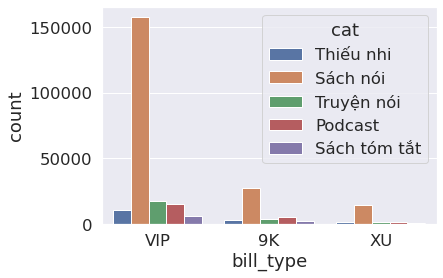

In [21]:
sns.set(style='darkgrid', font_scale=1.5)
sns.countplot(x = 'bill_type', hue = 'cat', data = user_paid_listen)

In [251]:
user_paid_listen[user_paid_listen.bill_type == 'VIP'].groupby(['bill_type','sub_cat'])\
.agg({
    'userID' :'count',
    'actual_duation': 'mean',
    'playlist_duration':'mean'
})\
.reset_index().sort_values(by = 'userID', ascending = False ).head(10)

,bill_type,sub_cat,userID,actual_duation,playlist_duration
25,VIP,Tâm linh,59705,32.200149,479.531935
22,VIP,Thành công,37957,17.227831,336.312464
11,VIP,Kỹ năng,13641,15.987215,335.245136
6,VIP,Kinh doanh,12423,17.178604,382.628777
4,VIP,Hạnh phúc,11524,15.049375,246.690559
20,VIP,Thiếu nhi,10683,9.300356,196.488739
18,VIP,Sách tóm tắt,6085,14.688792,30.169121
8,VIP,Kinh điển Quốc tế,5797,17.925824,946.939658
0,VIP,Con cái,4334,16.696724,663.584010
13,VIP,Lịch sử,3889,14.126948,400.341862


In [250]:
user_paid_listen[user_paid_listen.bill_type == 'XU'].groupby(['bill_type','sub_cat'])\
.agg({
    'userID' :'count',
    'actual_duation': 'mean',
    'playlist_duration':'mean'
})\
.reset_index().sort_values(by = 'userID', ascending = False ).head(10)

,bill_type,sub_cat,userID,actual_duation,playlist_duration
25,XU,Tâm linh,6128,41.203035,520.438691
22,XU,Thành công,3780,15.760608,317.041032
20,XU,Thiếu nhi,1519,7.677551,133.909941
11,XU,Kỹ năng,1440,18.842569,347.443681
6,XU,Kinh doanh,1017,16.605015,348.459194
4,XU,Hạnh phúc,815,15.470307,241.913374
18,XU,Sách tóm tắt,714,15.313445,30.353081
9,XU,Kinh điển Việt Nam,618,20.244984,344.752913
10,XU,Kiến thức,524,9.246183,435.979580
8,XU,Kinh điển Quốc tế,451,17.252106,903.076497


In [252]:
user_paid_listen[user_paid_listen.bill_type == '9K'].groupby(['bill_type','sub_cat'])\
.agg({
    'userID' :'count',
    'actual_duation': 'mean',
    'playlist_duration':'mean'
})\
.reset_index().sort_values(by = 'userID', ascending = False ).head(10)

,bill_type,sub_cat,userID,actual_duation,playlist_duration
25,9K,Tâm linh,10047,27.676839,494.585856
22,9K,Thành công,7247,15.102994,317.159142
20,9K,Thiếu nhi,2706,7.863452,161.309017
11,9K,Kỹ năng,2661,13.705787,274.993461
18,9K,Sách tóm tắt,2055,12.290803,31.729002
4,9K,Hạnh phúc,2000,10.965200,224.521650
6,9K,Kinh doanh,1991,16.318835,353.066549
9,9K,Kinh điển Việt Nam,1623,17.462354,305.326248
10,9K,Kiến thức,1326,9.978205,169.338311
30,9K,Văn học VN Hiện đại,921,15.928773,240.008686


In [263]:
user_paid_listen[user_paid_listen.bill_type == 'VIP'].groupby(['userID','sub_cat'])\
['actual_duation'].min().reset_index().sort_values(by= 'actual_duation', ascending = False).head(20)

,userID,sub_cat,actual_duation
8427,75175,Sách tóm tắt,636.1
3135,51489,Sách tóm tắt,203.7
6915,65343,Sách tóm tắt,182.8
3532,52827,Pháp thoại,152.4
3653,53322,Pháp thoại,127.3
9382,82486,Sách tóm tắt,127.2
5175,58585,Pháp thoại,115.9
11711,106247,Thành công,112.0
1976,48443,Tâm linh,105.0
3997,54339,Văn hoá,104.3


In [265]:
user_paid_listen[user_paid_listen.bill_type == 'VIP'].groupby(['age_range','sub_cat'])\
['actual_duation'].min().reset_index().sort_values(by= 'actual_duation', ascending = False).head(20)

,age_range,sub_cat,actual_duation
205,Over 65,Sách tóm tắt,636.1
163,Below 18,Thiền - Tĩnh tâm,6.5
207,Over 65,Thiền - Tĩnh tâm,6.3
201,Over 65,Kinh điển Việt Nam,4.9
203,Over 65,Kỹ năng,2.8
98,45 - 54,Học ngoại ngữ,1.4
204,Over 65,Lịch sử,1.4
206,Over 65,Sức khoẻ,1.3
147,55 - 64,Trinh thám,0.9
199,Over 65,Kinh doanh,0.7


## Content value on each group

In [23]:
Paid_type_user = clustering[(clustering.main_clustering_description == 'Loyal Users') \
           | (clustering.main_clustering_description == 'New Paid Users')\
          | (clustering.main_clustering_description == 'Potential Users')]

In [24]:
Paid_type_user = pd.merge(Paid_type_user[['userID','main_clustering_description']]\
                          , listening, how = 'inner', on = 'userID')

### Loyal Users

In [42]:
loyal_user = Paid_type_user[Paid_type_user.main_clustering_description == 'Loyal Users'].groupby([
    'sub_cat','playlist_name','main_clustering_description'
]).agg({
    'actual_duation': 'sum',
    'playlistID': 'count'
}).reset_index().sort_values(by = ['actual_duation','playlistID'], ascending = False)

In [43]:
loyal_user['avg_actual'] = loyal_user.actual_duation / loyal_user.playlistID

In [44]:
loyal_user.sort_values(by = 'avg_actual', ascending = False).head(10)

,sub_cat,playlist_name,main_clustering_description,actual_duation,playlistID,avg_actual
679,Sách tóm tắt,[Sách Tóm Tắt] Trong Chớp Mắt,Loyal Users,336.5,4,84.125000
563,Pháp thoại,Chủ Động Cái Chết Để Tái Sinh Trong Một Kiếp S...,Loyal Users,4197.1,54,77.724074
575,Pháp thoại,Kinh Quán Thế Âm Đại Bi Tâm Đà La Ni,Loyal Users,696.8,10,69.680000
781,Thiếu nhi,Sống Xanh - Đức Vua Tham Lam Ở Xứ Hạnh Phúc,Loyal Users,1171.8,17,68.929412
14,Con cái,Dạy Học Với Trọn Vẹn Yêu Thương,Loyal Users,1492.4,23,64.886957
580,Pháp thoại,Phép Lạ Của Sự Tĩnh Thức,Loyal Users,1698.1,27,62.892593
645,Sách tóm tắt,[Sách Tóm Tắt] Ngũ Luận Thư,Loyal Users,120.0,2,60.000000
639,Sách tóm tắt,[Sách Tóm Tắt] Lãnh Đạo Phong Cách Barack Obama,Loyal Users,348.4,6,58.066667
690,Sách tóm tắt,[Sách Tóm Tắt] Tư Duy Như Một Kẻ Lập Dị,Loyal Users,458.5,8,57.312500
450,Lãnh đạo,Luôn Là Cảm Hứng,Loyal Users,665.6,12,55.466667


### New Paid Users

In [39]:
new_paid_user = Paid_type_user[Paid_type_user.main_clustering_description == 'New Paid Users'].groupby([
    'sub_cat','playlist_name','main_clustering_description'
]).agg({
    'actual_duation': 'sum',
    'playlistID': 'count'
}).reset_index().sort_values(by = ['actual_duation','playlistID'], ascending = False)

In [40]:
new_paid_user['avg_actual'] = new_paid_user.actual_duation / new_paid_user.playlistID

In [47]:
new_paid_user.sort_values(by = ['avg_actual','playlistID','actual_duation'], ascending = False).head(10)

,sub_cat,playlist_name,main_clustering_description,actual_duation,playlistID,avg_actual
822,Văn học Quốc tế Hiện đại,Hồi Ức Về Những Cô Gái Điếm Buồn Của Tôi,New Paid Users,1801.9,13,138.607692
298,Kỹ năng,Bước ra thế giới,New Paid Users,914.5,11,83.136364
207,Kinh điển Quốc tế,Đảo Giấu Vàng,New Paid Users,865.7,11,78.700000
740,Tâm linh,Bên Bờ Sinh Tử - Gieo Nhân Lành Để Nhận Quả Lành,New Paid Users,1405.6,21,66.933333
498,Sách tóm tắt,[Sách Tóm Tắt] Những Điều Trường Harvard Vẫn K...,New Paid Users,64.4,1,64.400000
430,Pháp thoại,Kinh A Di Đà,New Paid Users,221.0,4,55.250000
392,Lứa đôi,Hôn Nhân - Chuyện Thêm Và Bớt,New Paid Users,655.6,12,54.633333
269,Kiến thức,Phụ Nữ Và Cuộc Sống,New Paid Users,107.7,2,53.850000
774,Tâm linh,Trở Về Từ Cõi Sáng,New Paid Users,7261.7,144,50.428472
756,Tâm linh,Muôn Kiếp Nhân Sinh - Tập 1,New Paid Users,117931.5,2354,50.098343


### Potential Users

In [34]:
potentail_user = Paid_type_user[Paid_type_user.main_clustering_description == 'Potential Users'].groupby([
    'sub_cat','playlist_name','main_clustering_description'
]).agg({
    'actual_duation': 'sum',
    'playlistID': 'count'
}).reset_index().sort_values(by = ['actual_duation','playlistID'], ascending = False)

In [35]:
potentail_user['avg_actual'] = potentail_user.actual_duation / potentail_user.playlistID

In [38]:
potentail_user.sort_values(by = 'avg_actual', ascending = False).head(10)

,sub_cat,playlist_name,main_clustering_description,actual_duation,playlistID,avg_actual
767,Thiếu nhi,Truyện Thiếu Nhi Hạt giống tâm hồn 3 - Tâm Hồn...,Potential Users,1134.1,13,87.238462
371,Kỹ năng,Có Điều Kiện Cứ Thể Hiện,Potential Users,325.6,4,81.400000
280,Kinh điển Việt Nam,Nửa Chừng Xuân,Potential Users,1768.9,22,80.404545
290,Kinh điển Việt Nam,Truyện Ngắn Thạch Lam 2 - Bóng Người Xưa,Potential Users,1005.8,14,71.842857
889,Trinh thám,Hang Dã Thú,Potential Users,1416.5,21,67.452381
250,Kinh điển Quốc tế,Ruồi Trâu,Potential Users,392.7,6,65.450000
571,Sách tóm tắt,[Sách Tóm Tắt] 100 Ý Tưởng Bán Hàng Hay Nhất M...,Potential Users,313.1,5,62.620000
140,Hạnh phúc,Sức Mạnh Của Sự Tử Tế,Potential Users,782.3,14,55.878571
698,Thiếu nhi,Chú Mèo Đi Hia,Potential Users,440.1,8,55.012500
515,Ngôn tình,Phấn Hoa Lầu Xanh,Potential Users,709.9,13,54.607692


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
feature_vector = ['actual_duation_log','actual_duation_log','avg_actual_log']

In [55]:
error = 0.0001
potentail_user['actual_duation_log'] = np.log(potentail_user['actual_duation']+ error)
potentail_user['playlistID_log'] = np.log(potentail_user['playlistID']+ error)
potentail_user['avg_actual_log'] = np.log(potentail_user['avg_actual']+ error)
X_subset = potentail_user[feature_vector]
scaler = StandardScaler()
X_subset[feature_vector] = scaler.fit_transform(X_subset[feature_vector])

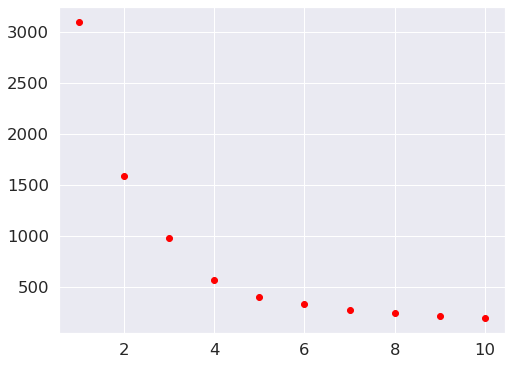

The best K sugesst:  10


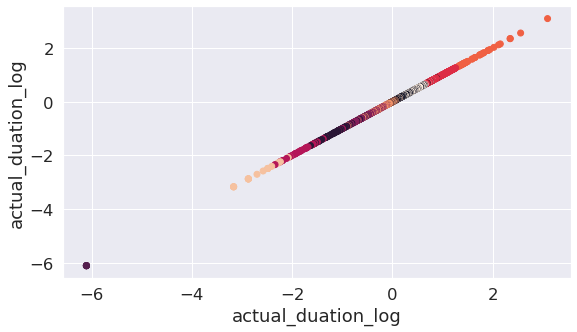

In [57]:
cl = 10
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_subset)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugesst: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_subset)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_subset.iloc[:,1], y = X_subset.iloc[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])

plt.show()

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    kmeans.fit(X_subset)
    score = silhouette_score(X_subset, kmeans.labels_)
    silhouette_coefficients.append(score)

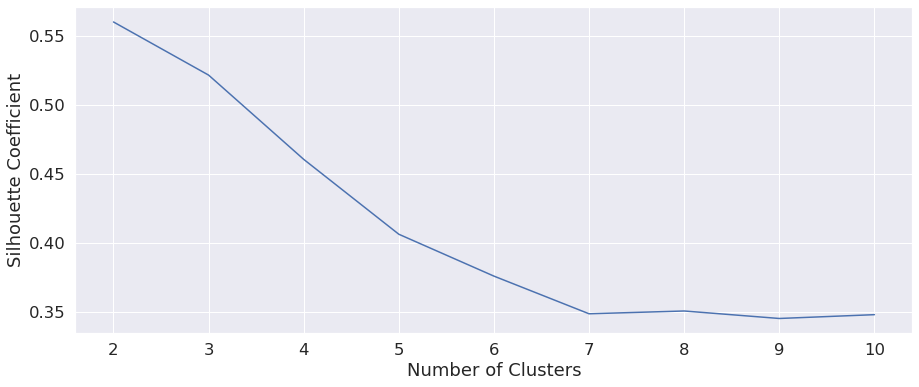

In [59]:
plt.figure(figsize = (15,6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()